In [2]:
import os, sys
import glob
import numpy as np
from astropy.table import Table, vstack, hstack, Column
import matplotlib.pyplot as plt
from matplotlib import patches
from astropy.coordinates import SkyCoord
import matplotlib.gridspec as gridspec


plt.style.use('mplstyle')

# # Time New Roman font doesn't works in tiger, so I use STIXGeneral
# plt.rcParams['font.family'] = 'STIXGeneral'
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20


# retina
%config InlineBackend.figure_format = 'retina'

datadir = '../dr1_qa/sky/'

In [34]:
# tract statistics
tract_stat_tbls = ['tract_stat_N540_gaap1p0Flux.ecsv',
                   'tract_stat_N540_gaap1p5Flux.ecsv',
                   'tract_stat_N708_gaap1p5Flux.ecsv',
                   'tract_stat_N708_gaap1p5Flux.ecsv',]
# patch statistics (for a single tract 8525)
patch_stat_tbls = ['patch_stat_8525_N540_gaap1p0Flux.ecsv',
                   'patch_stat_8525_N540_gaap1p5Flux.ecsv',
                   'patch_stat_8525_N708_gaap1p5Flux.ecsv',
                   'patch_stat_8525_N708_gaap1p5Flux.ecsv',]
                   

### N708 
tract_stat_n708 = Table.read(datadir + 'tract_stat_N708_gaap1p0Flux.ecsv', format='ascii.ecsv')
patch_stat_n708 = Table.read(datadir + 'patch_stat_8525_N708_gaap1p0Flux.ecsv', format='ascii.ecsv')

print('Use %d tracts: %s' % (len(tract_stat), tract_stat['tract'].data))
print('Use %d patches for Tract %d' % (len(patch_stat), patch_stat.meta['tract']))

# N540
tract_stat_n540 = Table.read(datadir + 'tract_stat_N540_gaap1p0Flux.ecsv', format='ascii.ecsv')
patch_stat_n540 = Table.read(datadir + 'patch_stat_8525_N540_gaap1p0Flux.ecsv', format='ascii.ecsv')

print('Use %d tracts: %s' % (len(tract_stat), tract_stat['tract'].data))
print('Use %d patches for Tract %d' % (len(patch_stat), patch_stat.meta['tract']))


Use 21 tracts: [ 8280  8525  8764  9010  9078  9088  9099  9135  9227  9319  9456  9459
  9470  9556  9800  9939  9953 10040 10048 10061 10427]
Use 81 patches for Tract 8525
Use 21 tracts: [ 8280  8525  8764  9010  9078  9088  9099  9135  9227  9319  9456  9459
  9470  9556  9800  9939  9953 10040 10048 10061 10427]
Use 81 patches for Tract 8525


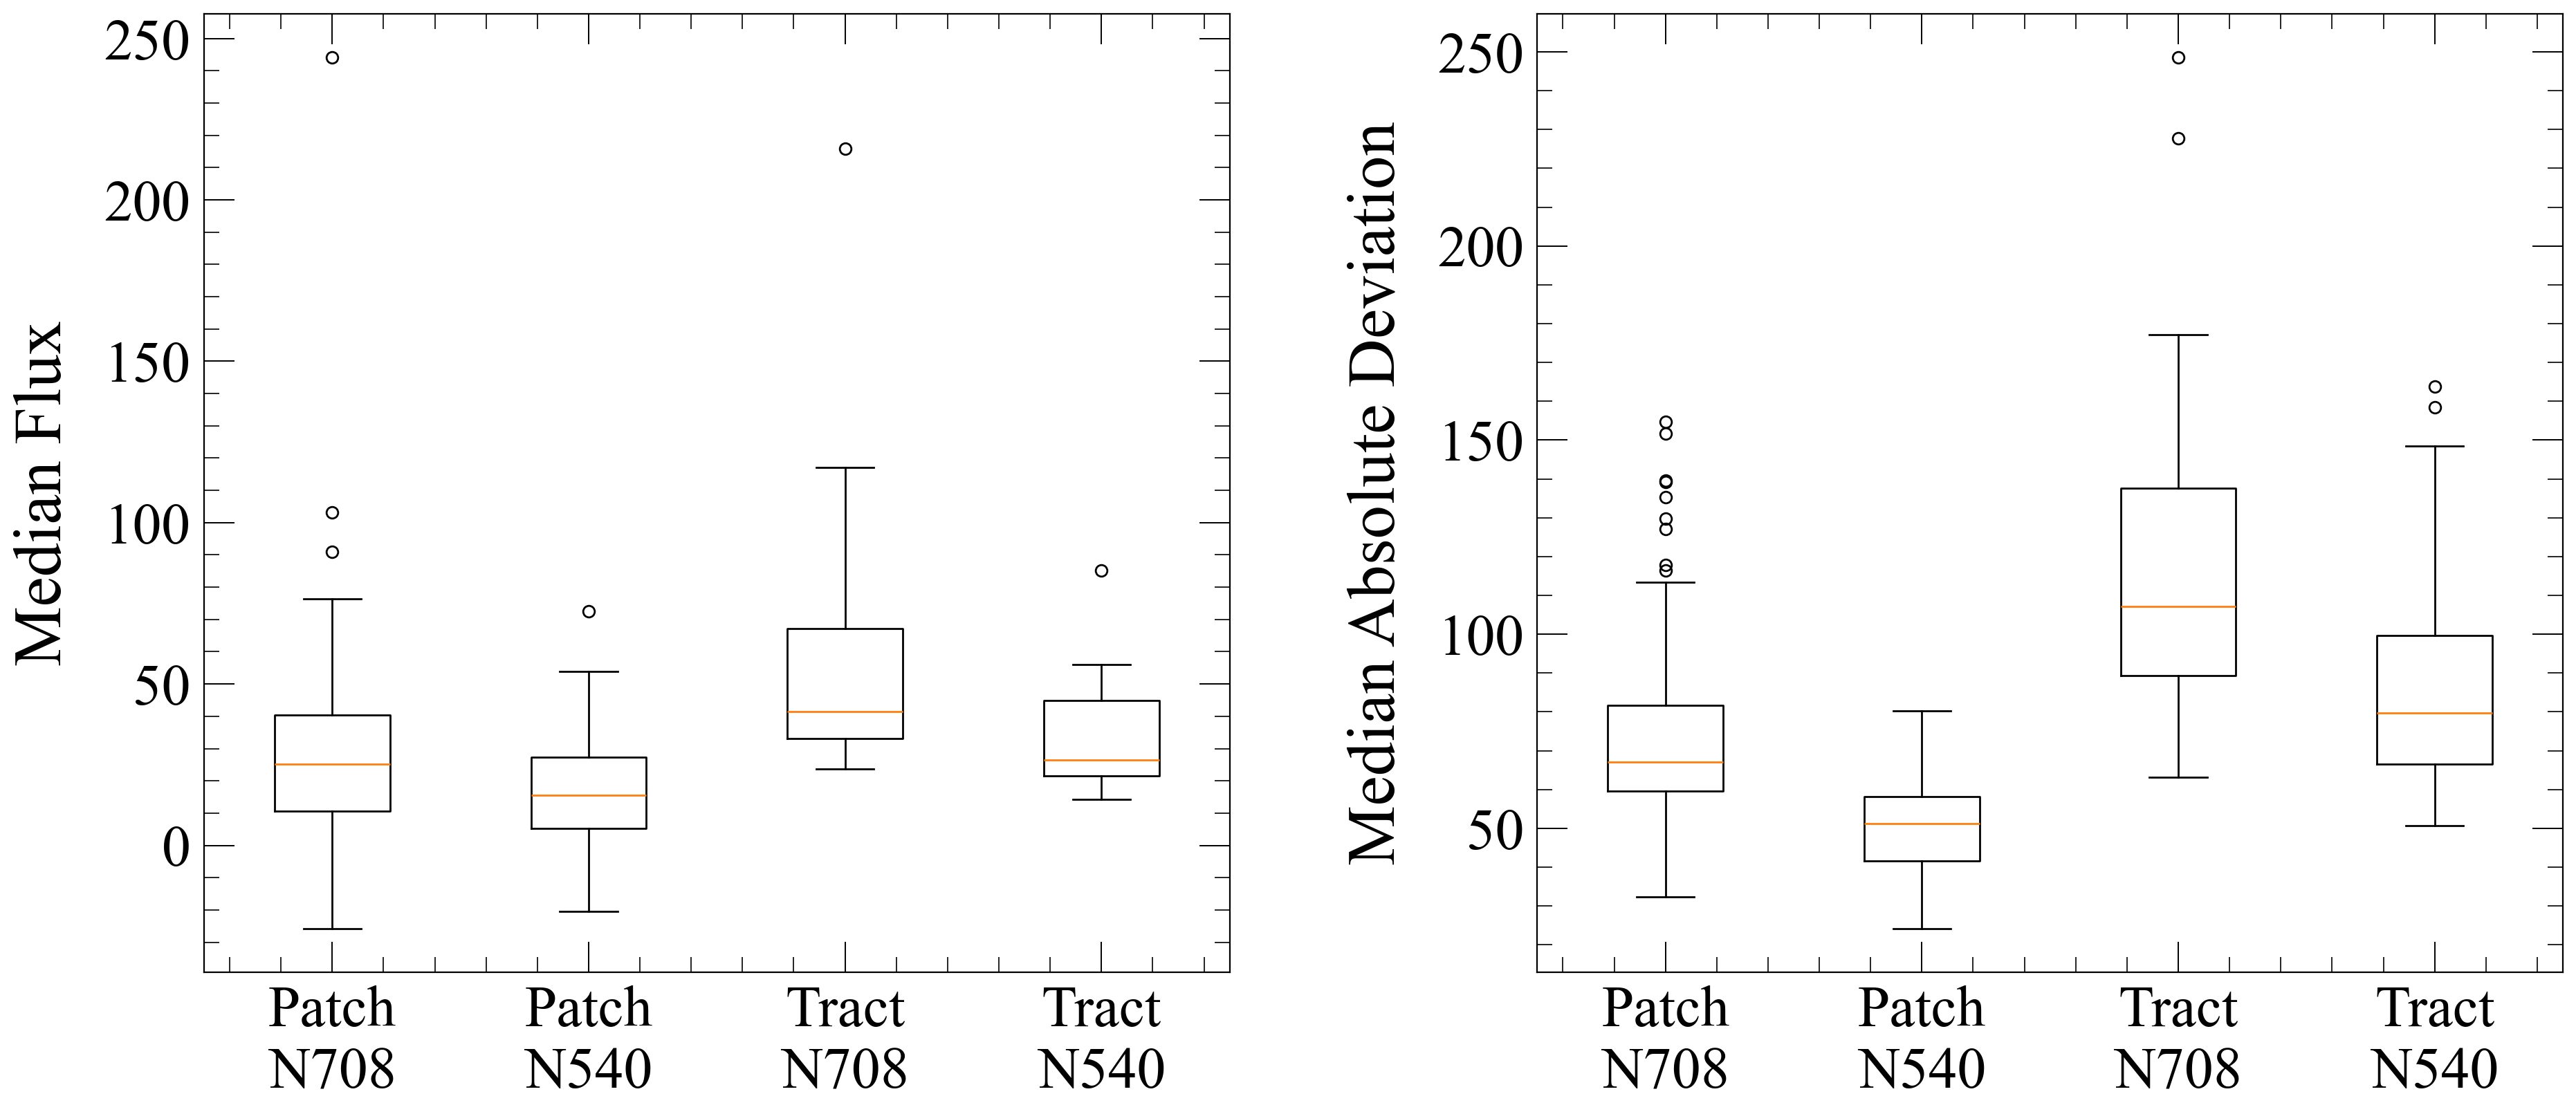

In [185]:
# Create boxplots
fig = plt.figure(figsize=(22,9))

colors = ['#d73027', '#1a9850', '#d73027', '#1a9850']

# Mean Flux Boxplot
ax_flux = plt.subplot(1, 2, 1)
bplot1 = ax_flux.boxplot([patch_stat_n708['median'], patch_stat_n540['median'], tract_stat_n708['median'], tract_stat_n540['median']], 
                labels=['Patch\nN708', 'Patch\nN540', 'Tract\nN708', 'Tract\nN540'], showfliers=True)
ax_flux.set_ylabel('Median Flux', labelpad=15)
# patch_artist = True

# Standard Deviation Boxplot
ax_sd = plt.subplot(1, 2, 2)
ax_sd.boxplot([patch_stat_n708['std'], patch_stat_n540['std'], tract_stat_n708['std'], tract_stat_n540['std']], 
              labels=['Patch\nN708', 'Patch\nN540', 'Tract\nN708', 'Tract\nN540'], showfliers=True)

bplot2 = ax_sd.set_ylabel('Median Absolute Deviation', labelpad=15)

plt.subplots_adjust(wspace=0.3)


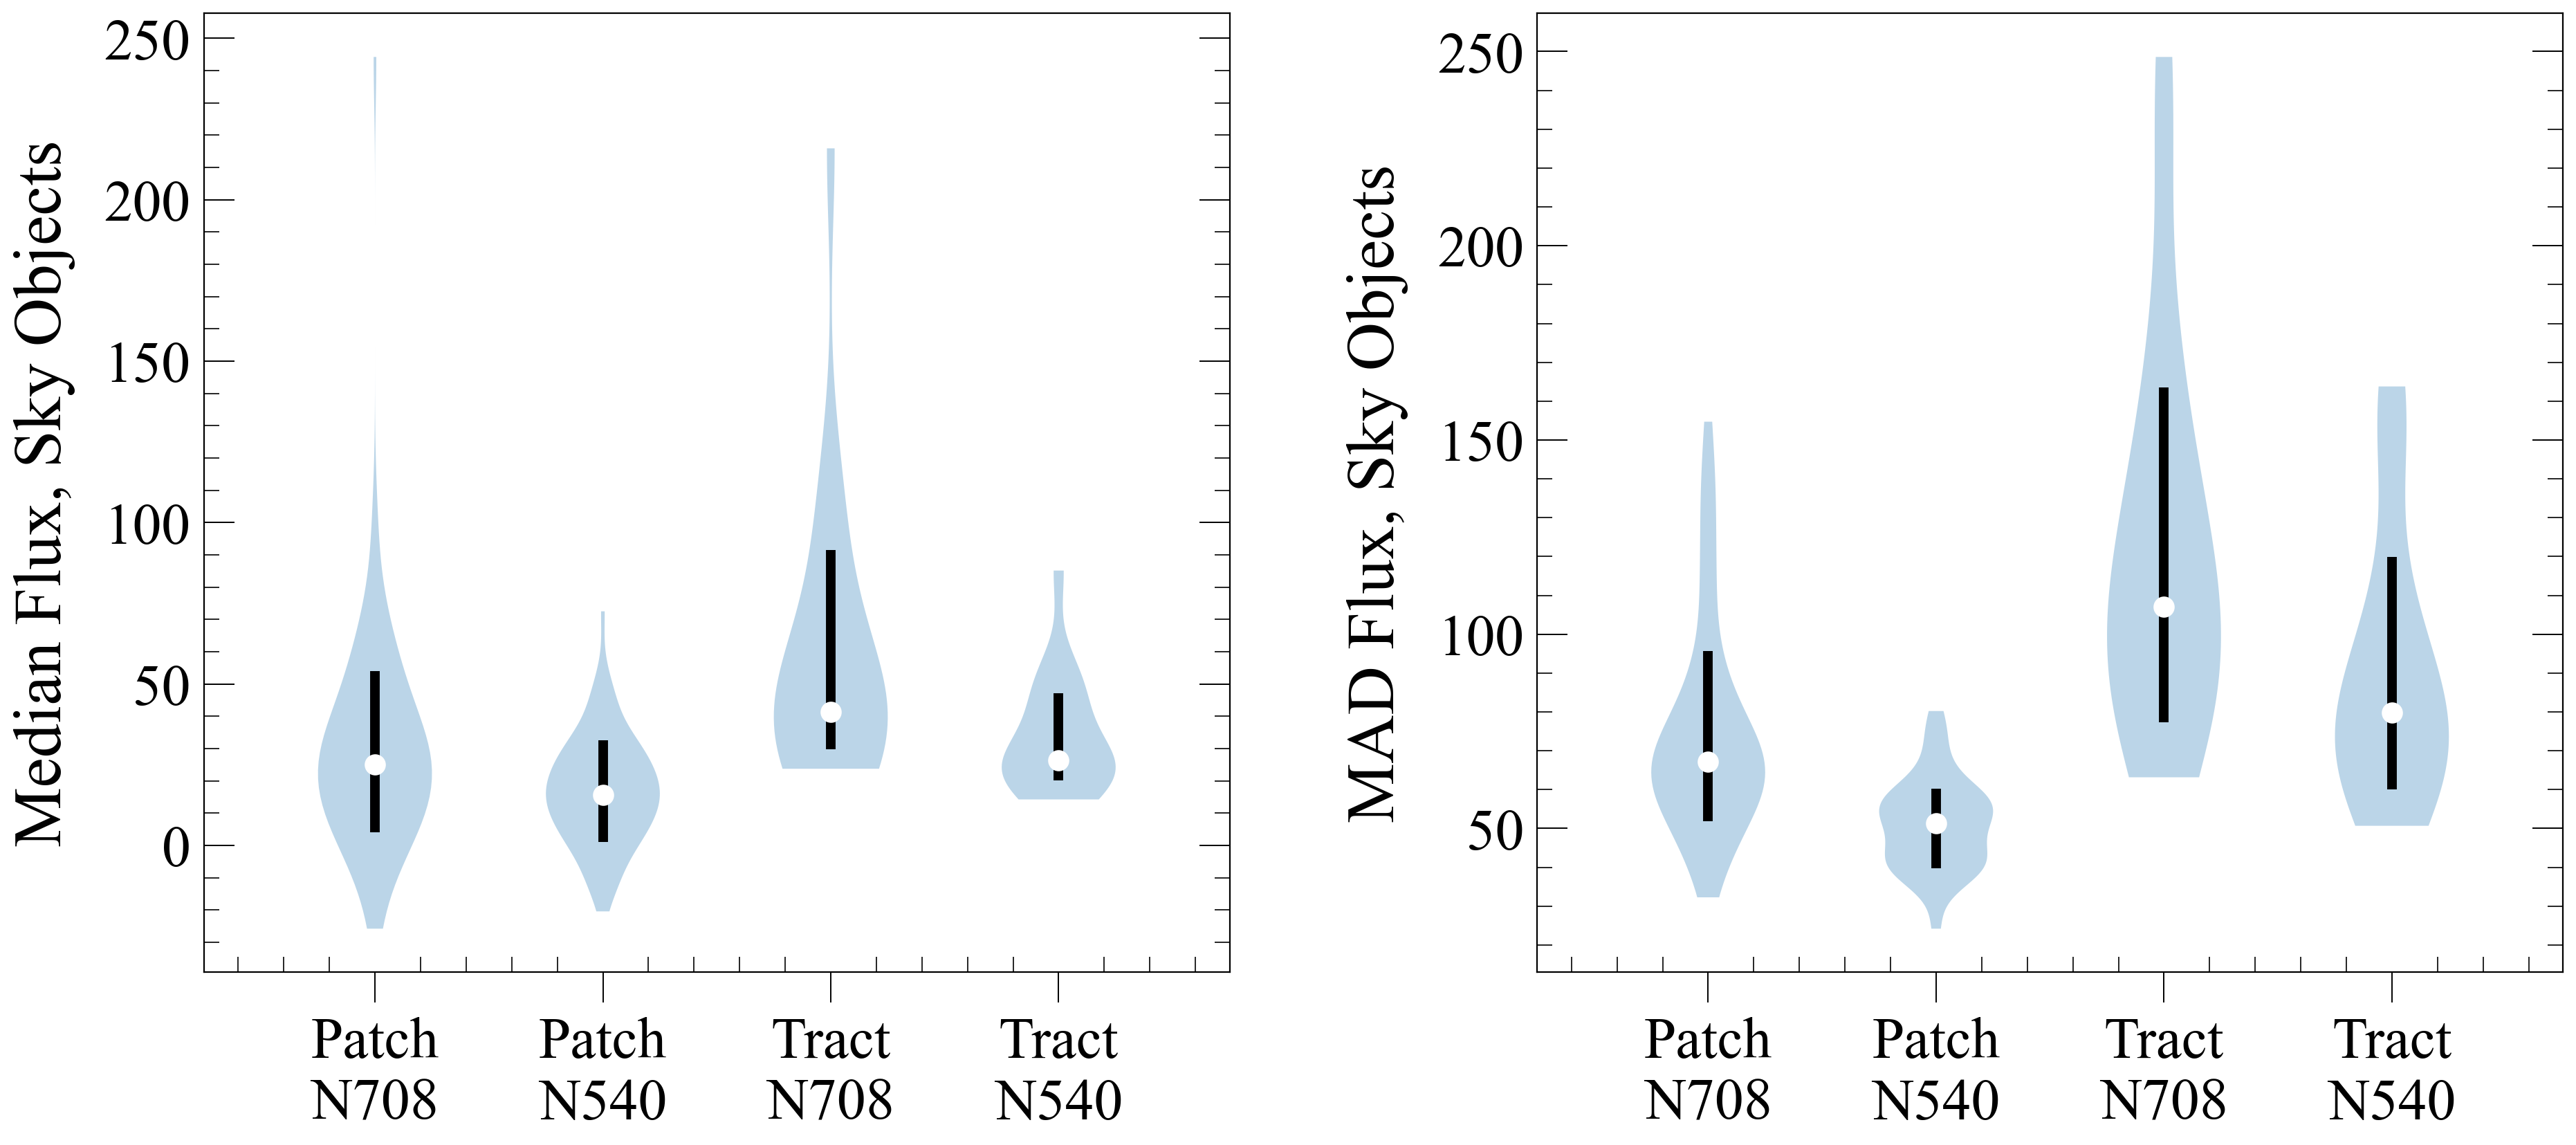

In [186]:
# Create Violon plots
fig = plt.figure(figsize=(22,9))

# Mean Flux Boxplot
ax_flux = plt.subplot(1, 2, 1)
data_median = np.array([patch_stat_n708['median'].tolist(), patch_stat_n540['median'].tolist(), 
                        tract_stat_n708['median'].tolist(), tract_stat_n540['median'].tolist()], dtype=object)
bplot1 = ax_flux.violinplot(data_median, showmeans=False, showmedians=False, showextrema=False)                            
ax_flux.set_ylabel('Median Flux, Sky Objects', labelpad=15)
# patch_artist = True

# Standard Deviation Boxplot
ax_sd = plt.subplot(1, 2, 2)
data_mad = [np.asarray(patch_stat_n708['std']), np.asarray(patch_stat_n540['std']), 
            np.asarray(tract_stat_n708['std']), np.asarray(tract_stat_n540['std'])]
ax_sd.violinplot(data_mad, showmeans=False, showmedians=False, showextrema=False)

bplot2 = ax_sd.set_ylabel('MAD Flux, Sky Objects', labelpad=15)

def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

labels = ['Patch\nN708', 'Patch\nN540', 'Tract\nN708', 'Tract\nN540']
for ax in [ax_flux, ax_sd]:
    set_axis_style(ax, labels)

medians_quartile_50 = []
medians_quartile_16 = []
medians_quartile_84 = []
for i in range(len(data_median)):
    medians_quartile_50.append(np.median(data_median[i]))
    medians_quartile_16.append(np.percentile(data_median[i], 16))
    medians_quartile_84.append(np.percentile(data_median[i], 84))

mads_quartile_50 = []
mads_quartile_16 = []
mads_quartile_84 = []
for i in range(len(data_mad)):
    mads_quartile_50.append(np.median(data_mad[i]))
    mads_quartile_16.append(np.percentile(data_mad[i], 16))
    mads_quartile_84.append(np.percentile(data_mad[i], 84))

inds_flux = np.arange(1, len(medians) + 1)
ax_flux.scatter(inds_flux, medians_quartile_50, marker='o', color='white', s=100, zorder=3)
ax_flux.vlines(inds_flux, medians_quartile_16, medians_quartile_84, color='k', linestyle='-', lw=5)

inds_mad = np.arange(1, len(mads) + 1)
ax_sd.scatter(inds_mad, mads, marker='o', color='white', s=100, zorder=3)
ax_sd.vlines(inds_mad, mads_quartile_16, mads_quartile_84, color='k', linestyle='-', lw=5)


plt.subplots_adjust(wspace=0.3)

plt.savefig('figures/skyobj_flux_stat.jpeg', dpi=300, bbox_inches='tight')